# <center> Neural Networks and Deep Learning (CSCI 5922)</center>
# <center> Spring 2019 </center>

**Name:** Shafiuddin Rehan Ahmed

## Goal

The goal of this assignment is to introduce neural networks in terms of ideas you are already familiar with:  linear regression and linear-threshold classification

## Dataset

You are given a dataset with 2 input variables ($x_1$, $x_2$) and an output variable ($y$).

In [81]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
import numpy as np
import os
from sklearn.linear_model import LinearRegression

In [56]:
np.random.seed(42)
# Load data
data = np.loadtxt(os.path.join('data', 'assign1_data.txt'))
X = data[:,:2]
y = data[:, 2].reshape((-1,1))
z = data[:, 3].reshape((-1,1))

In [57]:
print(X.shape)
print(y.shape)
print(z.shape)

(100, 2)
(100, 1)
(100, 1)


## Part 1

Write a program to find the least squares solution to $y = w_1 x_1 + w_2 x_2 + b$ for the above dataset. 

Complete the following function below and use it to answer questions (A) and (B). 

**Note:** Please do not change the interface of the given function.

In [273]:
def lms_error(W, X, y):
    return np.sum(((X.dot(W.T)) - y)**2, axis=0)

def gradient(W, X, y):
    """
    Return the gradient
    W : Weight vector
    X : input
    y : output
    returns: Delta W
    """
    return 2*(X.dot(W.T) - y).T.dot(X)

def gd_step(W, X, y, eta):
    """
    Update Weight vector and return it
    """
    return W - eta*gradient(W, X, y)

def stocastic_gd(X, y, eta=0.01, batch_size=1, iters=1000):
    n = X.shape[0]
    m = X.shape[1]
    W = np.zeros((1, m+1)) # include b in W
    X_oned = np.hstack((X, np.ones((n,1))))
    for iter_ in range(iters):
        for i in range(0, n, batch_size):
            x_batch = X_oned[i:i+batch_size,:]
            y_batch = y[i:i+batch_size, :]
            W = gd_step(W, x_batch, y_batch, eta)
#             print(lms_error(W, X_oned, y))
    return W

def lms(X, y):
    """
    Finds the Least Mean Squares solution
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of output value 'y' (size : no of examples X 1)
    
    Returns
    -------
    w : solution array
    """
    n = X.shape[0]
    m = X.shape[1]
    W = np.zeros((1, m+1)) # include b in W
    X_oned = np.hstack((X, np.ones((n,1))))
    w = np.linalg.lstsq(X_oned, y, rcond=None)
#     w = stocastic_gd(X, y)
    return w[0].T

In [274]:
W_final = lms(X,y)
final_error = 145.256670
print(W_final)

[[-2.0442426   3.99686017 -0.92429081]]


(A) Report the values of $w_1$, $w_2$, and $b$.

$w_1 = -2.044$

$w_2 = 3.997$

$b = -0.924$

(B) What function or method did you use to find the least-squares solution?

numpy.linalg.lstsq:

"Solves the equation a x = b by computing a vector x that minimizes the Euclidean 2-norm || b - a x ||^2."

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linalg.lstsq.html

## Part 2

Using the LMS algorithm, write a program that determines the coefficients {w1,w2,b} via incremental updating, steepest descent, and multiple passes through the training data. You will need to experiment with updating rules (online, batch, minibatch), step sizes (i.e., learning rates), stopping criteria, etc. Experiment to find settings that lead to solutions with the fewest number of sweeps through the data.

Complete the following functions below and use them to answer questions (A), (B) and (C). You may find the shuffle function from scikit-learn useful. 

Use the following hyperparameters:

Learning rates = [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]

MaxIter = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]

**Note:** Please do not change the interface of the given functions.

In [381]:
from sklearn.utils import shuffle
alphas = [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]
maxiters = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]

def gd_step(W, X, y, eta):
    """
    Update Weight vector and return it
    """
    return W - eta*gradient(W, X, y)

def stocastic_gd(W, X, y, eta=0.01, batch_size=16):
    n = X.shape[0]
    for i in range(0, n, batch_size):
        x_batch = X[i:i+batch_size,:]
        y_batch = y[i:i+batch_size, :]
        W = gd_step(W, x_batch, y_batch, eta)
    return W

def gradient(W, X, y):
    """
    Return the gradient
    W : Weight vector
    X : input
    y : output
    returns: Delta W
    """
    return 2*(X.dot(W.T) - y).T.dot(X)/X.shape[0]

def online_update(X, y, w, eta, batch_size=1):
    """
    One iteration of the online update over the entire dataset (one sweep of the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    """
    return stocastic_gd(w, X, y, eta, 1)
    

def batch_update(X, y, w, eta, batch_size=n):
    """
    One iteration of the batch update.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    """
    n = X.shape[0]
    return stocastic_gd(w, X, y, eta, n)

def mini_batch_update(X, y, w, eta, batch_size):
    """
    One iteration of the mini-batch update over the entire dataset (one sweep of the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    batch_size : size of the batch for gradient update
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    """
    return stocastic_gd(w, X, y, eta, batch_size)

def lms_grad_desc(X, y, maxIter, alpha, update, batch_size, stop_ratio = 0.01, force_stop = False, silent=False):
    """
    Implements the LMS with gradient descent.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    maxIter : Maximum number of iterations allowed
    alpha : Learning rate
    update : update function to utilize (one of online, batch, mini-batch)
    batch_size : number of examples in a batch (only useful when update = mini_batch_update)
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    
    Note : *batch_size is an optional argument and only to be used when doing mini-batch Gradient Descent 
    """
    n = X.shape[0]
    m = X.shape[1]
    W = np.zeros((1, m+1)) # include b in W
    X_oned = np.hstack((X, np.ones((n,1))))
    errors = []
    errors.append(lms_error(W, X_oned, y))
    for iters in range(maxIter):
        indices = shuffle(range(n))
        X_shuf = X_oned[indices, :]
        y_shuf = y[indices, :]
        W = update(X_shuf, y_shuf, W, alpha, batch_size)
        error_now = lms_error(W, X_oned, y)
#         print (error_now)
        if errors[-1] - error_now > 0 and np.abs(errors[-1] - error_now) < stop_ratio and force_stop:
            break
        errors.append(error_now)
#         if np.linalg.norm(W_final - W) < 0.05 and force_stop:
#             break
    if not silent:
        print("Total iters for alpha: %f batch_size: %d is %d" % (alpha, batch_size, iters))
        print("Error: %f" %lms_error(W, X_oned, y))
    return W, errors
        

(A) Report the values of $w_1$, $w_2$, and $b$. 

In [340]:
updates = [online_update, batch_update]
max_iter = 10000
print("Experimenting on online update vs batch_update")
for update in updates:
    print("-------------- Running experiments on %s -------------" %update.__name__)
    for alpha in alphas:
        w, _ = lms_grad_desc(X, y, max_iter, alpha, update, 1, force_stop=True) 

Experimenting on online update vs batch_update
-------------- Running experiments on online_update -------------
Total iters for alpha: 0.001000 batch_size: 1 is 223
Error: 4.312943
Total iters for alpha: 0.050000 batch_size: 1 is 84
Error: 3.944234
Total iters for alpha: 0.010000 batch_size: 1 is 23
Error: 4.252104
Total iters for alpha: 0.050000 batch_size: 1 is 45
Error: 3.944719
Total iters for alpha: 0.100000 batch_size: 1 is 82
Error: 3.960005
Total iters for alpha: 0.300000 batch_size: 1 is 1187
Error: 5.450189
-------------- Running experiments on batch_update -------------
Total iters for alpha: 0.001000 batch_size: 1 is 4922
Error: 41.593793
Total iters for alpha: 0.050000 batch_size: 1 is 393
Error: 4.689383
Total iters for alpha: 0.010000 batch_size: 1 is 1359
Error: 7.722107
Total iters for alpha: 0.050000 batch_size: 1 is 393
Error: 4.689383
Total iters for alpha: 0.100000 batch_size: 1 is 222
Error: 4.311329
Total iters for alpha: 0.300000 batch_size: 1 is 87
Error: 4.05

In [328]:
batches = [2, 5, 10, 15, 20, 25]
for batch in batches:
    for alpha in alphas:
        w = lms_grad_desc(X, y, max_iter, alpha, mini_batch_update, batch, force_stop=True) 

Total iters for alpha: 0.001000 batch_size: 2 is 394
Error: 4.689208
Total iters for alpha: 0.050000 batch_size: 2 is 50
Error: 3.947438
Total iters for alpha: 0.010000 batch_size: 2 is 59
Error: 3.998198
Total iters for alpha: 0.050000 batch_size: 2 is 17
Error: 4.007927
Total iters for alpha: 0.100000 batch_size: 2 is 35
Error: 4.009154
Total iters for alpha: 0.300000 batch_size: 2 is 61
Error: 4.013406
Total iters for alpha: 0.001000 batch_size: 5 is 811
Error: 5.828393
Total iters for alpha: 0.050000 batch_size: 5 is 37
Error: 3.947561
Total iters for alpha: 0.010000 batch_size: 5 is 125
Error: 4.117039
Total iters for alpha: 0.050000 batch_size: 5 is 32
Error: 3.961063
Total iters for alpha: 0.100000 batch_size: 5 is 40
Error: 3.968165
Total iters for alpha: 0.300000 batch_size: 5 is 81
Error: 3.943674
Total iters for alpha: 0.001000 batch_size: 10 is 1360
Error: 7.718243
Total iters for alpha: 0.050000 batch_size: 10 is 55
Error: 4.030951
Total iters for alpha: 0.010000 batch_siz

In [384]:
W_sgd, _ = lms_grad_desc(X, y, 500, 0.05, online_update, 1, silent=True, force_stop=False)
print("W: %s" %str(W_sgd))

W: [[-2.05724479  3.95857685 -0.92682852]]


(B) What settings worked well for you:  online vs. batch vs. minibatch? What step size? How did you decide to terminate?

From the above experiment it looks like online update performs really well in terms of requiring lesser dataset sweeps to converge to the right W value. Alpha value of 0.05 works best. The results for that config is given below:

(C) Make a graph of error on the entire data set as a function of epoch. An epoch is a complete sweep through all the data.

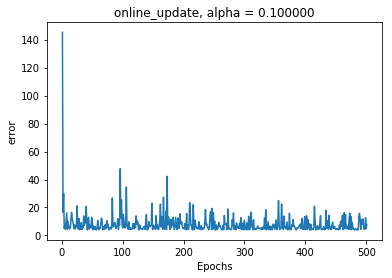

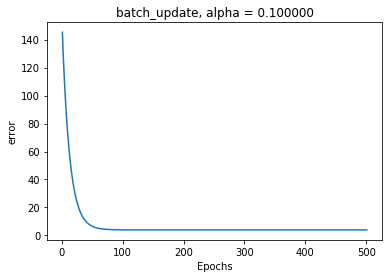

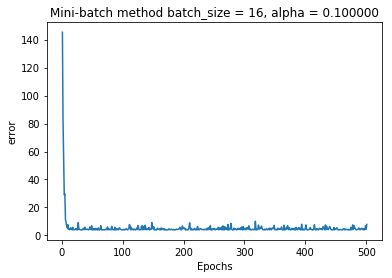

In [413]:
import matplotlib.pyplot as plt
def plot_graph(x_values, y_values, title, y_label='error', x_label = 'Epochs', x_ticks = None):
    plt.plot(x_values, y_values)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if x_ticks != None:
        plt.xticks(x_ticks)
    plt.show()

def plot_part_1_graphs():
    alpha = 0.1
    epochs = np.arange(501) + 1
    for update in updates:
#         w, errors_online = lms_grad_desc(X, y, 500, 0.3, online_update, 1, silent=True, force_stop=False)
        w, errors_update = lms_grad_desc(X, y, 500, 0.3, update, 1, silent=True, force_stop=False)
        plot_graph(epochs, errors_update, "%s, alpha = %f" %(update.__name__, alpha))
    w, error_batch = lms_grad_desc(X, y, 500, 0.3, mini_batch_update, 16, silent=True, force_stop=False)
    plot_graph(epochs, error_batch, "Mini-batch method batch_size = %d, alpha = %f" %(16, alpha))
plot_part_1_graphs()

## Part 3

The data set from a regression problem can be converted into a classification problem simply by using the sign of (+ or -) as representing one of two classes. In the data set used in Part 1 and 2, you'll see a variable that represents this binary (0 or 1) class.

Use the perceptron learning rule to solve for the coefficients {$w_1$, $w_2$, $b$} of this classification problem.   

Two warnings: First, your solution to Part 3 should require only a few lines of code changed from the code you wrote for Part 2. Second, the Perceptron algorithm will not converge if there is no exact solution to the training data. It will jitter among coefficients that all yield roughly equally good solutions.

Complete the following functions below and use them to answer questions (A) and (B). 

**Note:** Please do not change the interface of the given functions.

In [402]:
def perceptron_update(X, y, w, alpha):
    """
    One iteration of the Perceptron update over the entire dataset (not just a single point).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    incorrect : Incorrectly classified examples
    """
    incorrects = []
    n = X.shape[0]
    indices = shuffle(range(n))
    for index in indices:
        xx = X[index, :]
        yy = y[index]
        if yy*(xx.dot(w.T)) <= 0:
                w = w + alpha*yy*xx.reshape((1, -1))
                incorrects.append(index)
    return w, incorrects

def perceptron(X, y, maxIter, alpha):
    """
    Implements the Perceptron algorithm.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    maxIter : The maximum number of iterations allowed 
    alpha : Learning Rate
    
    Returns
    -------
    w : Coefficients of the classifier
    incorrect : Incorrectly classified examples on termination
    """
    n = X.shape[0]
    m = X.shape[1]
    w = np.zeros((1, m+1)) # include b in W
    X_oned = np.hstack((X, np.ones((n,1))))
    incorrect_epochs = []
    for _ in range(maxIter):
        w, incorrects = perceptron_update(X_oned, y, w, alpha)
        incorrect_epochs.append(incorrects)
#         print("incorrect classifications: %d" % len(incorrects))
    return w, (1 - np.array([len(inc) for inc in incorrect_epochs])/n)*100.0

(A) Report the values of coefficients $w_1$, $w_2$, and $b$.

In [404]:
z_per = 2*z - 1
w, accuracies = perceptron(X, z_per, 1000, 0.1)
print(w)

[[-1.56522  2.39664 -0.3    ]]


$w_1 = -1.565$

$w_2 = 2.388$

$b = -0.3$

(B) Make a graph of the accuracy (% correct classification) on the training set as a function of epoch.

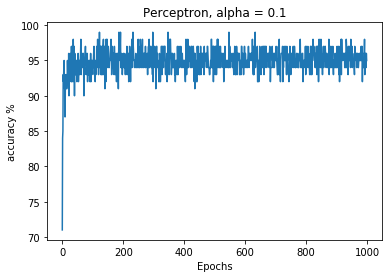

In [407]:
epochs_perc = np.arange(1000)
plot_graph(epochs_perc, accuracies, 'Perceptron, alpha = 0.1', y_label='accuracy %')

## Part 4

In machine learning, we really want to train a model based on some data and then expect the model to do well on "out of sample" data. Try this with the code you wrote for Part 3:  Train the model on the first {5, 10, 25, 50, 75} examples in the data set and test the model on the final 25 examples.

Complete the following function below and use it to answer (A). 

**Note:** Please do not change the interface of the given function.

In [409]:
def classify(X, y, w):
    """
    Use this function to classify examples in the test set
    
    Parameters
    ----------
    X : Test set features
    y : Test set labels
    w : Perceptron coefficients
    
    Returns
    -------
    correct : number of correctly classified examples
    """
    n = X.shape[0]
    X_oned = np.hstack((X, np.ones((n,1))))
    return np.sum(np.sign(y*X_oned.dot(w.T)) > 0)

train_data_indices = [5, 10, 25, 50, 75]
accs = []
for tdi in train_data_indices:
    x_train = X[:tdi, :]
    y_train = z_per[:tdi]
    x_test = X[tdi:, :]
    y_test = z_per[tdi:]
    w, _ = perceptron(x_train, y_train, 500, 0.1)
    accs.append(classify(x_test, y_test, w)/x_test.shape[0])
print (accs)

[0.6842105263157895, 0.8333333333333334, 0.9333333333333333, 0.94, 0.92]


How does performance on the test set vary with the amount of training data? Make a bar graph showing performance for each of the different training set sizes.

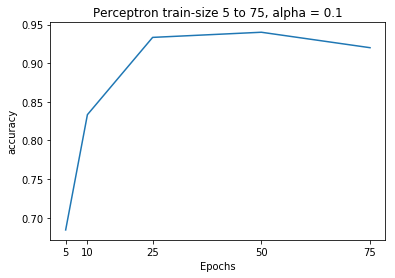

In [416]:
lens = np.arange(len(train_data_indices)) + 1
plot_graph(train_data_indices, accs, "Perceptron train-size 5 to 75, alpha = 0.1", y_label='accuracy', x_ticks=train_data_indices)

# End